# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
pima = pd.read_csv("pima-indians-diabetes (1).data")
pima.head(10)

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


Since column names are not mentioned and first row is selected as column name, we need to get new column names with 1st row considered as data again rather than index names.

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

Changing the column names as per the data available on kaggle.

In [3]:
colnames = ['Pregnancies', 'Glucose(plasma)', 'Bloodpressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome class']
pima = pd.read_csv("pima-indians-diabetes (1).data", names= colnames)

In [4]:
pima.head(10)

,Pregnancies,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q2. Print 10 samples from the dataset

In [5]:
pima.sample(10)

,Pregnancies,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome class
672,10,68,106,23,49,35.5,0.285,47,0
476,2,105,80,45,191,33.7,0.711,29,1
609,1,111,62,13,182,24.0,0.138,23,0
607,1,92,62,25,41,19.5,0.482,25,0
214,9,112,82,32,175,34.2,0.260,36,1
297,0,126,84,29,215,30.7,0.520,24,0
252,2,90,80,14,55,24.4,0.249,24,0
247,0,165,90,33,680,52.3,0.427,23,0
623,0,94,70,27,115,43.5,0.347,21,0
464,10,115,98,0,0,24.0,1.022,34,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
print(pima.info())
print('\n')
print('Shape of pima dataset in terms of rows and columns =',pima.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                   768 non-null int64
Glucose(plasma)               768 non-null int64
Bloodpressure                 768 non-null int64
Skin Thickness                768 non-null int64
Insulin                       768 non-null int64
BMI                           768 non-null float64
Diabetes Pedigree Function    768 non-null float64
Age                           768 non-null int64
Outcome class                 768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Shape of pima dataset in terms of rows and columns = (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [7]:
pima.apply(pd.Series.value_counts)

,Pregnancies,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome class
0.000,111.0,5.0,35.0,227.0,374.0,11.0,NaN,NaN,500.0
0.078,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
0.084,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
0.085,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
0.088,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
579.000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
600.000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
680.000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
744.000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


we have 111 '0's in pregnancies column, 5 '0's in glucose column, 35 '0's in Blood pressure column,227 '0's in Skin Thickness column, 374 '0's in Insulin column,11 '0's in BMI column, null '0's in Diabetes Pedigree Function and Age columns.

Since it is not logical to have 0 values for features like Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function and	Age,we will replace it with suitable values.However for feature like Pregnancy and Class ,it is not logical to replace the 0 with median or other suitable values as '0's are valid '0's in these two features.So we will filter our data with these two features before replacing '0's.Then we will replace the '0's of other features with median or other suitable values.

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [8]:
pimadup = pima.drop(['Outcome class','Pregnancies'],axis=1)
pimadup.head(10)

,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
6,78,50,32,88,31.0,0.248,26
7,115,0,0,0,35.3,0.134,29
8,197,70,45,543,30.5,0.158,53
9,125,96,0,0,0.0,0.232,54


It shud be noted that before finding the medians of columns we need to change '0's with nan values,other wise our medians will be calculated with 0 counted as a value in it .Hence it will be a different mean from actual mean calculated with available values except '0's in the column.

Replacing 0's with nan values first.

In [9]:
pimadup.replace(0,np.nan,inplace =True)
pimadup.head(10)

,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
5,116.0,74.0,NaN,NaN,25.6,0.201,30
6,78.0,50.0,32.0,88.0,31.0,0.248,26
7,115.0,NaN,NaN,NaN,35.3,0.134,29
8,197.0,70.0,45.0,543.0,30.5,0.158,53
9,125.0,96.0,NaN,NaN,NaN,0.232,54


Finding medians of Individual columns

In [10]:
pimadup.median()

Glucose(plasma)               117.0000
Bloodpressure                  72.0000
Skin Thickness                 29.0000
Insulin                       125.0000
BMI                            32.3000
Diabetes Pedigree Function      0.3725
Age                            29.0000
dtype: float64

In [11]:
pimadup.fillna(pimadup.median(),inplace =True)
pimadup.head(10)

,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,148.0,72.0,35.0,125.0,33.6,0.627,50
1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,183.0,64.0,29.0,125.0,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
5,116.0,74.0,29.0,125.0,25.6,0.201,30
6,78.0,50.0,32.0,88.0,31.0,0.248,26
7,115.0,72.0,29.0,125.0,35.3,0.134,29
8,197.0,70.0,45.0,543.0,30.5,0.158,53
9,125.0,96.0,29.0,125.0,32.3,0.232,54


In [12]:
pimadup[['Pregnancies','Outcome class']] = pima[['Pregnancies','Outcome class']]
pima=pimadup

In [13]:
pima.head(10)

,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Pregnancies,Outcome class
0,148.0,72.0,35.0,125.0,33.6,0.627,50,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
5,116.0,74.0,29.0,125.0,25.6,0.201,30,5,0
6,78.0,50.0,32.0,88.0,31.0,0.248,26,3,1
7,115.0,72.0,29.0,125.0,35.3,0.134,29,10,0
8,197.0,70.0,45.0,543.0,30.5,0.158,53,2,1
9,125.0,96.0,29.0,125.0,32.3,0.232,54,8,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [14]:
pima.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Glucose(plasma),768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Bloodpressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
Skin Thickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
Diabetes Pedigree Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Outcome class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [15]:
pima.groupby(["Outcome class"]).count()

,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Pregnancies
Outcome class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [16]:
import matplotlib.pyplot as plt

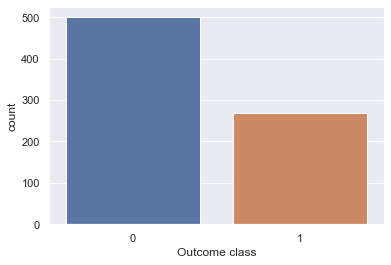

In [17]:
sns.countplot(pima['Outcome class'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

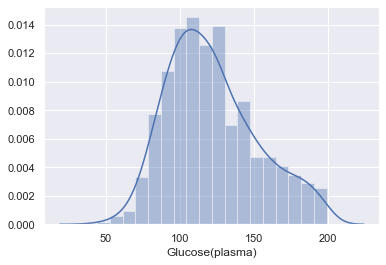

In [18]:
sns.distplot(pima['Glucose(plasma)'])

The plot shows that Glucose attribute is almost normally distributed with no outliers.

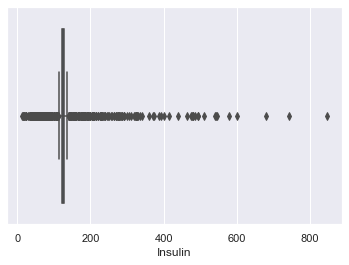

In [19]:
sns.boxplot(pima['Insulin'])

The plot shows that Insulin attributes have large number of outliers.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [20]:
pima.corr()

,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Pregnancies,Outcome class
Glucose(plasma),1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.128213,0.492782
Bloodpressure,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.208615,0.165723
Skin Thickness,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.081770,0.214873
Insulin,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.025047,0.203790
BMI,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.021559,0.312038
Diabetes Pedigree Function,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,1.000000,0.221898
Outcome class,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,0.221898,1.000000


C:\Users\anku\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\anku\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


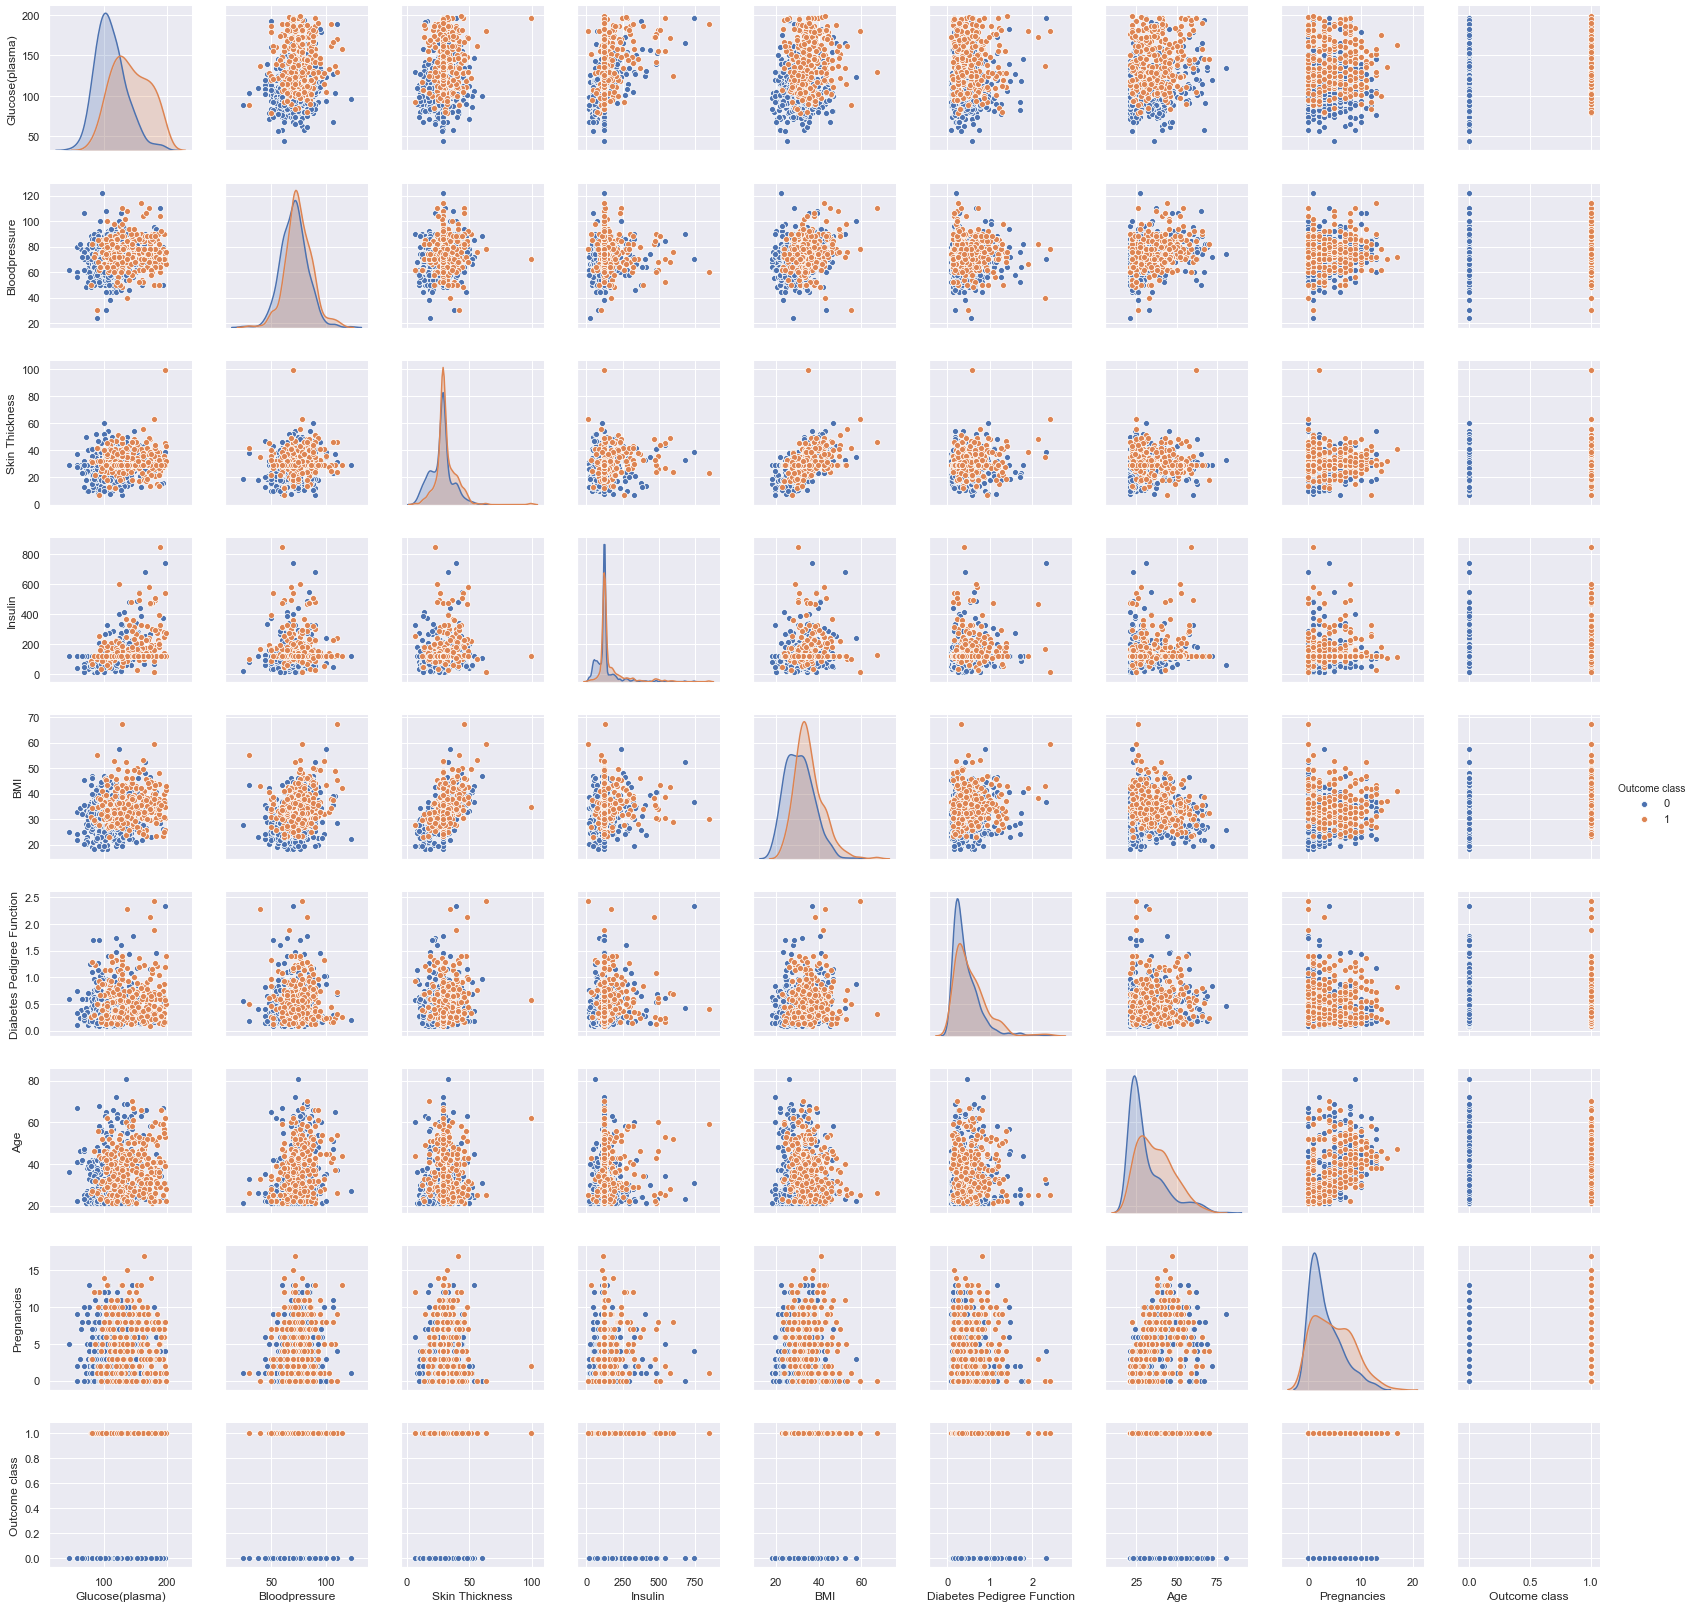

In [21]:
sns.pairplot(pima , hue='Outcome class' , diag_kind = 'kde')

Using the plot - infer the relationship between different variables

In case of Glucose Plasma and BMI the peak values of normal distribution are slightly different which make it a good and considerable features for  predictions. Blood Pressure,Skin thickness ,Insulin,Diabetes Pedigree Function and Pregnancies are less likely to provide good predictions because of overlapping peak values on distribution table.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
pima.head(0)

,Glucose(plasma),Bloodpressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Pregnancies,Outcome class


In [24]:
print('X sample')
X = pima.iloc[:,0:8]
print(X.sample(1))
print('\n')
print('\n')
print('Y sample')
Y=pima.iloc[:,8]
print(Y.sample(2))

X sample
     Glucose(plasma)  Bloodpressure  Skin Thickness  Insulin   BMI  \
218             85.0           74.0            22.0    125.0  29.0   

     Diabetes Pedigree Function  Age  Pregnancies  
218                       1.224   32            5  




Y sample
47     0
625    0
Name: Outcome class, dtype: int64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [28]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [29]:
y_predict = dt_model.predict(X_test)

In [30]:
print(dt_model.score(X_train , Y_train))
print(dt_model.score(X_test, Y_test))

1.0
0.7359307359307359


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(Y_test,y_predict)

array([[117,  30],
       [ 31,  53]], dtype=int64)

Print the feature importance of the decision model - Optional

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RFpima = RandomForestClassifier(n_estimators = 400, random_state=40)
RFpima.fit(X_train, Y_train)
print('Accuracy score =',RFpima.score(X_test,Y_test))

Accuracy score = 0.7619047619047619


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ADBpima = AdaBoostClassifier(base_estimator=dt_model,n_estimators=200,random_state=40)
ADBpima.fit(X_train, Y_train)
print('Accuracy score =',ADBpima.score(X_test,Y_test))

Accuracy score = 0.7229437229437229


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
BGpima = BaggingClassifier(base_estimator=dt_model,n_estimators=300,random_state=40)
BGpima.fit(X_train, Y_train)
print('Accuracy score =',BGpima.score(X_test,Y_test))

Accuracy score = 0.7748917748917749


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
GBpima = GradientBoostingClassifier(n_estimators= 200, learning_rate=0.1,random_state=40)
GBpima.fit(X_train, Y_train)
print('Accuracy score =',GBpima.score(X_test,Y_test))

Accuracy score = 0.7489177489177489


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [41]:
from sklearn.ensemble import VotingClassifier

In [42]:
VCFpima = VotingClassifier(estimators=[
    ('RFpima',RFpima), ('ADBpima', ADBpima), ('BGpima', BGpima), ('GBpima',GBpima)], voting='soft')
VCFpima.fit(X_train, Y_train)
print('Accuracy score =',VCFpima.score(X_test,Y_test))

Accuracy score = 0.7402597402597403
